In [67]:
import statistics
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
file_input =\
open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\cnn_user_pref_legal\inputs-8445-.dev.txt',
                        'r', encoding="mbcs")
file_pred =\
open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\cnn_user_pref_legal\predictions-8445-.dev.txt',
                         'r', encoding="mbcs")
file_targ =\
open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\cnn_user_pref_legal\targets-8445-.dev.txt',
                         'r', encoding="mbcs")

inputs = file_input.readlines()
pred   = file_pred.readlines()
targ   = file_targ.readlines()

file_input.close()
file_pred.close()
file_targ.close()

In [69]:
inputs[0]

'-----:0\n'

In [70]:
text_in = []
for line in inputs:
    if line[0] != '-' and line[0] != '[':
        line = line.strip('\n')
        text_in.append(line)

In [71]:
text_in[0]

'Short. device information as described below we collect information from and about the computers phones connected tvs and other web connected devices you use that integrate with our products and we combine this information across different devices you use. for example we use information collected about your use of our products on your phone to better personalize the content including ads or features you see when you use our products on another device such as your laptop or tablet or to measure whether you took an action in response to an ad we showed you on your phone on a different device. information we obtain from these devices includes device attributes information such as the operating system hardware and software versions battery level signal strength available storage space browser type app and file names and types and plugins. device operations information about operations and behaviors performed on the device such as whether a window is foregrounded or backgrounded or mouse m

In [72]:
for k,text in enumerate(text_in):
    if text[:30]=='Short. A butcher whose country':
        print(k)

In [73]:
text_in[22]

'Short. please be aware that we may transfer your information to israel the european union and other countries through certain third parties that we use to operate and manage the site and services including amazon web services aws or google cloud services.'

In [74]:
summaries = []
for line in pred:
    if line[0] != '-':
        line = line.strip('\n')
        summaries.append(line)   
        
targets = []
for line in targ:
    if line[0] != '-':
        line = line.strip('\n')
        targets.append(line)   

In [75]:
print(summaries[0])
len(summaries[0].split(' '))

device information as described below we collect information from and about the computers phones connected tvs and other web connected devices you use . for example we use information collected about your use of our products on another device such as your laptop or tablet or to measure whether you took an action in response to an ad we showed you on your phone on a different device .


69

In [76]:
print(targets[0])
len(targets[0].split(' '))

collects all data you send username email credit card number any kind of info other put about you as well. plus all info about your device.


26

In [77]:
print(targets[22])
len(targets[22].split(' '))

your data may be processed and stored anywhere in the world.


11

In [78]:
print(summaries[22])
len(summaries[22].split(' '))

Short.


1

In [79]:
df = pd.DataFrame({'text':text_in, 'summary':summaries})
df[:30]

,text,summary
0,Short. device information as described below w...,device information as described below we colle...
1,Long. you agree that all disputes between you ...,you waive your right to participate in a class...
2,Short. we disclose such information to service...,twitch may disclose your personal information ...
3,Short. complaints if you wish to lodge a compl...,Short. complaints if you wish to lodge a compl...
4,Long. in addition content you delete may conti...,in addition content you delete may continue to...
5,Short. you agree that by entering into this ag...,Short.
6,Long. in some circumstances your information m...,in some circumstances your information may be ...
7,Short. you give us permission to use your name...,Short.
8,Short. you own the content you create and shar...,Short.
9,Long. all our email communications to you will...,all our email communications to you will conta...


In [80]:
df1 = df[df.summary != 'Short.']

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 89
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     66 non-null     object
 1   summary  66 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [82]:
df1[:30]

,text,summary
0,Short. device information as described below w...,device information as described below we colle...
1,Long. you agree that all disputes between you ...,you waive your right to participate in a class...
2,Short. we disclose such information to service...,twitch may disclose your personal information ...
3,Short. complaints if you wish to lodge a compl...,Short. complaints if you wish to lodge a compl...
4,Long. in addition content you delete may conti...,in addition content you delete may continue to...
6,Long. in some circumstances your information m...,in some circumstances your information may be ...
9,Long. all our email communications to you will...,all our email communications to you will conta...
10,Long. this policy was last updated on 1 june 2...,this policy was last updated on 1 june 2018 an...
11,Long. unless otherwise agreed to in a written ...,"twitch grants you a perpetual, worldwide, roya..."
12,Long. if you seek to file a legal claim agains...,you agree to file a legal claim against us in ...


In [83]:
df['keyword']=df['text'].str.slice(0,5)
df['text_len']= [ len(x.split(' ')) for x in df['text']]
df['summ_len']= [ len(x.split(' ')) for x in df['summary']]

In [84]:
df[:30]

,text,summary,keyword,text_len,summ_len
0,Short. device information as described below w...,device information as described below we colle...,Short,332,69
1,Long. you agree that all disputes between you ...,you waive your right to participate in a class...,Long.,33,16
2,Short. we disclose such information to service...,twitch may disclose your personal information ...,Short,136,10
3,Short. complaints if you wish to lodge a compl...,Short. complaints if you wish to lodge a compl...,Short,90,27
4,Long. in addition content you delete may conti...,in addition content you delete may continue to...,Long.,23,138
5,Short. you agree that by entering into this ag...,Short.,Short,31,1
6,Long. in some circumstances your information m...,in some circumstances your information may be ...,Long.,64,42
7,Short. you give us permission to use your name...,Short.,Short,44,1
8,Short. you own the content you create and shar...,Short.,Short,33,1
9,Long. all our email communications to you will...,all our email communications to you will conta...,Long.,12,10


In [85]:
df['keyword'].value_counts()

Long.    45
Short    45
Name: keyword, dtype: int64

(array([42., 30., 10.,  4.,  0.,  0.,  2.,  0.,  0.,  2.]),
 array([ 12. ,  60.9, 109.8, 158.7, 207.6, 256.5, 305.4, 354.3, 403.2,
        452.1, 501. ]),
 <BarContainer object of 10 artists>)

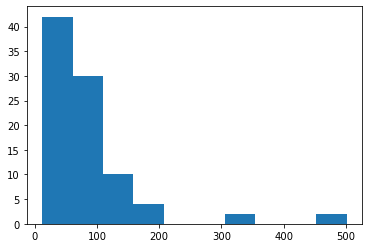

In [86]:
plt.hist(df['text_len'])

In [87]:
df.groupby(['keyword']).mean()['summ_len']

keyword
Long.    52.177778
Short    10.422222
Name: summ_len, dtype: float64

In [88]:
df_long  = df[df['keyword']=='Long.']
df_short = df[df['keyword']=='Short']

In [89]:
df_long['keyword'].value_counts()

Long.    45
Name: keyword, dtype: int64

In [90]:
df_short['keyword'].value_counts()

Short    45
Name: keyword, dtype: int64

In [91]:
df_long['summ_len'].mean()

52.17777777777778

In [92]:
df_short['summ_len'].mean()

10.422222222222222

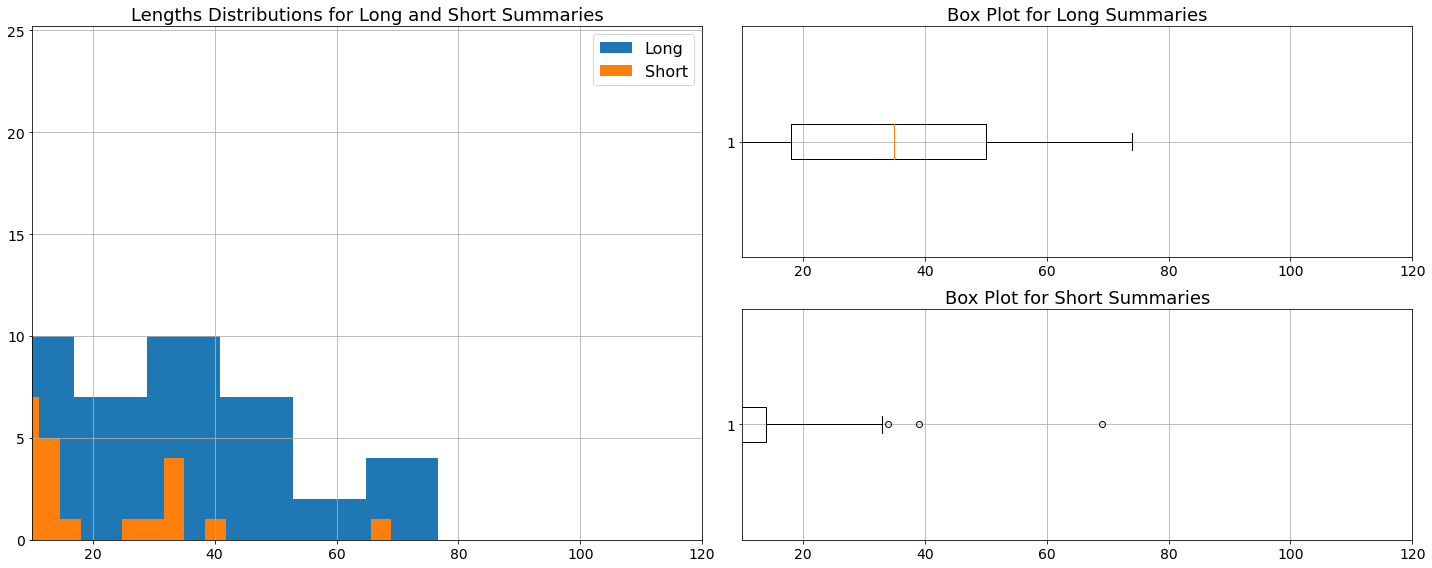

In [98]:
fig = plt.figure(figsize=(20,8))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])

ax1.grid()
ax2.grid()
ax3.grid()

ax1.hist(df_long['summ_len'], bins=20, label='Long')
ax1.hist(df_short['summ_len'], bins=20, label='Short')
ax1.set_title('Lengths Distributions for Long and Short Summaries',fontsize=18)
ax1.legend(fontsize=16)

ax2.boxplot(df_long['summ_len'], vert=False,)
ax2.set_title('Box Plot for Long Summaries',fontsize=18)

ax3.boxplot(df_short['summ_len'],vert=False,)
ax3.set_title('Box Plot for Short Summaries',fontsize=18)

for tick in ax1.xaxis.get_major_ticks(): tick.label.set_fontsize(14)
for tick in ax2.xaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax3.xaxis.get_major_ticks(): tick.label.set_fontsize(14)
    
for tick in ax1.yaxis.get_major_ticks(): tick.label.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax3.yaxis.get_major_ticks(): tick.label.set_fontsize(14) 

ax1.set_xlim(10,120)
ax2.set_xlim(10,120)
ax3.set_xlim(10,120)

plt.tight_layout()

In [99]:
from scipy import stats

In [100]:
stats.ttest_ind(df_long['summ_len'], df_short['summ_len'], equal_var=False)

Ttest_indResult(statistic=4.6128125925956756, pvalue=2.8574860559370476e-05)